In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score

import NRLMF

In [2]:
rna_sim=pd.read_csv('rna_similarity.txt',sep='\t')
prot_sim=pd.read_csv('prot_similarity.txt',sep='\t')
inter=pd.read_csv('list_of_interactions.txt',sep='\t')

rna_cnt=inter['RNA_ID'].unique().shape[0] # m
prot_cnt=inter['PROT_ID'].unique().shape[0] # n

Sl=np.empty((rna_cnt,rna_cnt))
Sp=np.empty((prot_cnt,prot_cnt))

for i in rna_sim.index:
    Sl[rna_sim['RNA(i)'][i]][rna_sim['RNA(j)'][i]]=rna_sim['Sim(i,j)'][i]

for i in prot_sim.index:
    Sp[prot_sim['PROT(i)'][i]][prot_sim['PROT(j)'][i]]=prot_sim['Sim(i,j)'][i]

Y=np.zeros((rna_cnt,prot_cnt))
for i in inter.index:
    Y[inter['RNA_ID'][i]][inter['PROT_ID'][i]]=1


In [4]:
# random_grouping=np.random.choice(rna_cnt,size=rna_cnt,replace=False)
# random_grouping=np.reshape(random_grouping,(10,np.int64(rna_cnt/10)))
# print(random_grouping)
# np.savetxt('NRLMF_CVS1.txt',random_grouping,fmt='%1d')
random_grouping=np.loadtxt('NRLMF_CVS1.txt',dtype=np.int64)
print(random_grouping)

[[749 563  92 865 984 617 851 102 457 170 874 812 972 361 846 965 717 176
  927 335 244 868 829 360  95 203 753 754 837 363 625 691 979  46 437 178
  147 963 278 608 200 474 319  24 589  56 104 935 280 737 503 271 616 795
   83  23 719 395 113 613 600  25 317  78  61 284  84 208 960 505 473 666
  154 594  63 331  26 751 212  20 631 343 133 645 968 120  89 892 140 646
  777 973 192 817 709 377 294 844 181]
 [657 287 782 969 943 700 441 686 698 109 676 463 659 546 557 708 619 712
  914 525 752 392 802 134 529  68 674 980 542  34 720 332 434 924 460 223
  122  50 606 349 864 549 138 810 942 590 199 789 906 261 871 470  16 198
  895 118 346 801 298 605 740 408   7 746 239 315 629  67 537 194  66 447
  848 732 533 697 248 899 125 206 404 270 399 824 932 119 772 153 872 436
   39 472 780 562 311 850 229 382 747]
 [249 479 803 135 855 306 451 484 224 531 845 375 251 638 538 826  18 653
  207 920 350 449  96 302 986 701  52 941 423 627 379 596 316 347 340 334
  269 946 150 293 255 950 448 215 

In [5]:
tpr_arr=[]
fpr_arr=[]
pre_arr=[]

def update_metrics(y_true,y_pred,tpr_arr,fpr_arr,pre_arr,ds_no):
    data ={'isTrue': y_true, 'Prob': y_pred}
    df=pd.DataFrame(data)
    df.sort_values(by=['Prob'],ascending=False,inplace=True)
    pos=len([i for i in range(len(y_true)) if y_true[i]==True])
    fal=len(y_true)-pos
    thresholds = np.linspace(0,1,500)
    tpr=[]
    fpr=[]
    pre=[]
    for th in thresholds:
        tp=0
        fp=0
        for i in df.index:
            if df['Prob'][i]<th:
                break
            if df['isTrue'][i]==1:
                tp+=1
            else:
                fp+=1
        tpr.append(tp/pos)
        fpr.append(fp/fal)
        if tp+fp!=0:
            pre.append(tp/(tp+fp))
        else:
            pre.append(1)
    tpr_arr.append(tpr)
    fpr_arr.append(fpr)
    pre_arr.append(pre)
    


+++ CVS-1: Dataset-0 +++
Negative RNA set=
[749, 563, 92, 865, 984, 617, 851, 102, 457, 170, 874, 812, 972, 361, 846, 965, 717, 176, 927, 335, 244, 868, 829, 360, 95, 203, 753, 754, 837, 363, 625, 691, 979, 46, 437, 178, 147, 963, 278, 608, 200, 474, 319, 24, 589, 56, 104, 935, 280, 737, 503, 271, 616, 795, 83, 23, 719, 395, 113, 613, 600, 25, 317, 78, 61, 284, 84, 208, 960, 505, 473, 666, 154, 594, 63, 331, 26, 751, 212, 20, 631, 343, 133, 645, 968, 120, 89, 892, 140, 646, 777, 973, 192, 817, 709, 377, 294, 844, 181]
Iteration count=8368
AUROC=0.9004260994909455
AUPR=0.6218750846006903
+++ CVS-1: Dataset-1 +++
Negative RNA set=
[657, 287, 782, 969, 943, 700, 441, 686, 698, 109, 676, 463, 659, 546, 557, 708, 619, 712, 914, 525, 752, 392, 802, 134, 529, 68, 674, 980, 542, 34, 720, 332, 434, 924, 460, 223, 122, 50, 606, 349, 864, 549, 138, 810, 942, 590, 199, 789, 906, 261, 871, 470, 16, 198, 895, 118, 346, 801, 298, 605, 740, 408, 7, 746, 239, 315, 629, 67, 537, 194, 66, 447, 848, 732, 

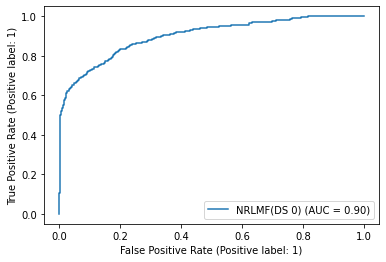

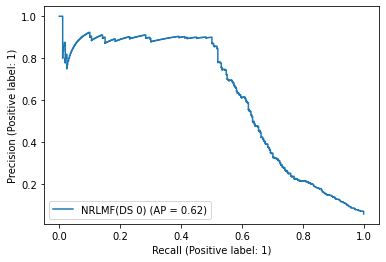

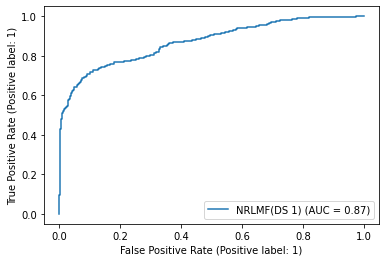

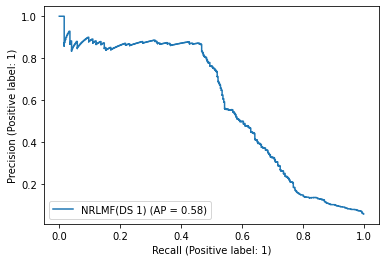

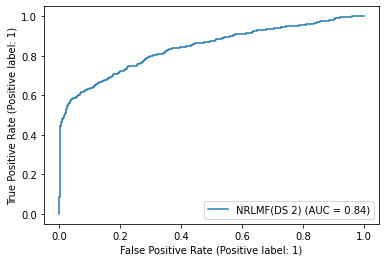

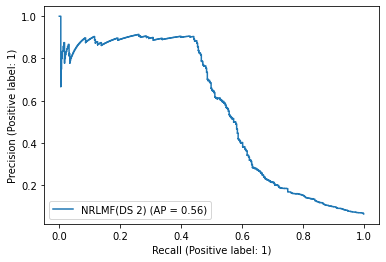

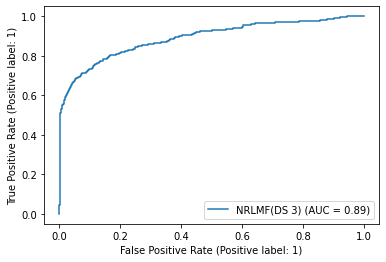

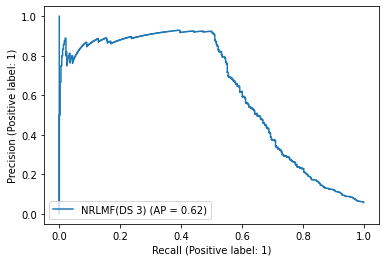

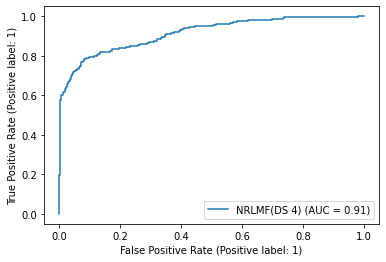

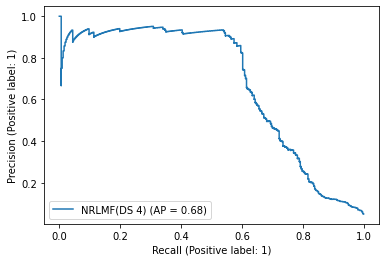

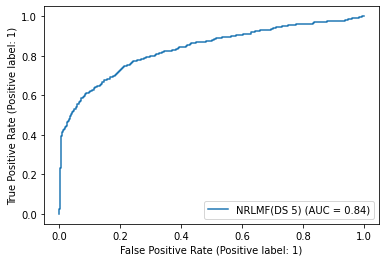

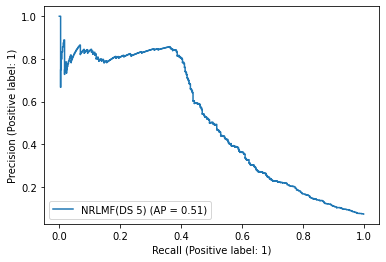

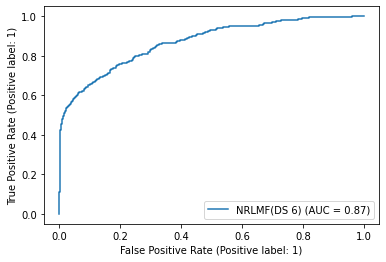

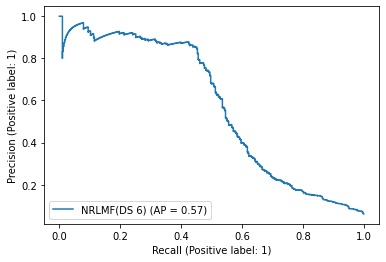

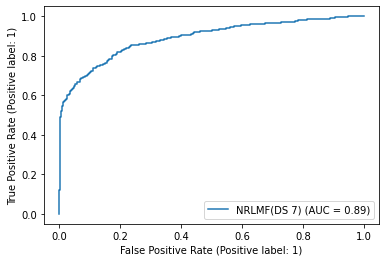

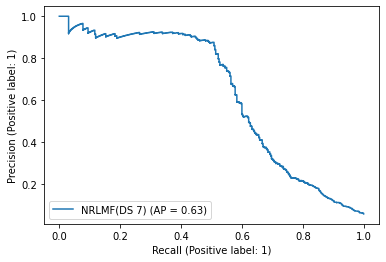

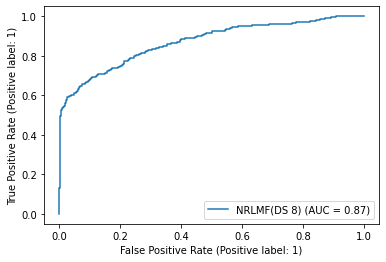

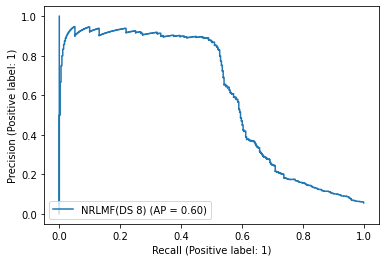

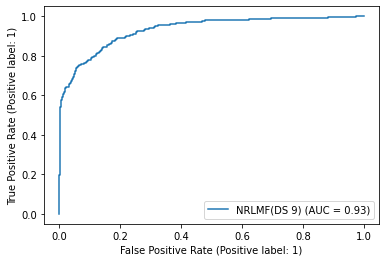

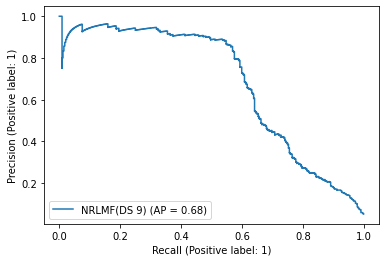

In [6]:
for i in range(10):
    print(f'+++ CVS-1: Dataset-{i} +++')
    neg_rna_set=[j for j in random_grouping[i]]
    print('Negative RNA set=',sep=' ')
    print(neg_rna_set)
    y_true=np.empty(0)
    for j in neg_rna_set:
        y_true=np.concatenate((y_true,Y[j]))
    modified_Y=Y.copy()
    for j in neg_rna_set:
        for k in range(prot_cnt):
            modified_Y[j][k]=0
    
    U,V=NRLMF.NRLMF(rna_cnt,prot_cnt,Sl,Sp,modified_Y,neg_rna_set)
    
    P=NRLMF.prob(U,V)
    y_pred=np.empty(0)
    for j in neg_rna_set:
        y_pred=np.concatenate((y_pred,P[j]))
    
    update_metrics(y_true,y_pred,tpr_arr,fpr_arr,pre_arr,i)
    
    auroc=roc_auc_score(y_true, y_pred)
    RocCurveDisplay.from_predictions(y_true,y_pred,name=f'NRLMF(DS {i})')
    print(f'AUROC={auroc}')
    
    aupr=average_precision_score(y_true,y_pred)
    PrecisionRecallDisplay.from_predictions(y_true,y_pred,name=f'NRLMF(DS {i})')
    print(f'AUPR={aupr}')
    

In [7]:
for i in range(len(tpr_arr)):
    tpr_arr[i].reverse()
    fpr_arr[i].reverse()
    pre_arr[i].reverse()

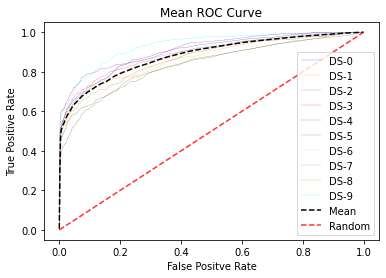

In [8]:
plt.plot(fpr_arr[0],tpr_arr[0],color="blue",linewidth=0.2,label='DS-0')
plt.plot(fpr_arr[1],tpr_arr[1],color="orange",linewidth=0.2,label='DS-1')
plt.plot(fpr_arr[2],tpr_arr[2],color="green",linewidth=0.2,label='DS-2')
plt.plot(fpr_arr[3],tpr_arr[3],color="red",linewidth=0.2,label='DS-3')
plt.plot(fpr_arr[4],tpr_arr[4],color="purple",linewidth=0.2,label='DS-4')
plt.plot(fpr_arr[5],tpr_arr[5],color="brown",linewidth=0.2,label='DS-5')
plt.plot(fpr_arr[6],tpr_arr[6],color="pink",linewidth=0.2,label='DS-6')
plt.plot(fpr_arr[7],tpr_arr[7],color="grey",linewidth=0.2,label='DS-7')
plt.plot(fpr_arr[8],tpr_arr[8],color="olive",linewidth=0.2,label='DS-8')
plt.plot(fpr_arr[9],tpr_arr[9],color="cyan",linewidth=0.2,label='DS-9')

mean_x_axis = [i for i in np.linspace(0,1,500)]
ys_interp = [np.interp(mean_x_axis, fpr_arr[i], tpr_arr[i]) for i in range(len(tpr_arr))]
mean_y_axis = np.mean(ys_interp, axis=0)

#print(ys_interp)

plt.plot(mean_x_axis, mean_y_axis, color="black",linestyle='--',label='Mean')
#plt.show()
plt.title("Mean ROC Curve")
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], linestyle='--', color='r',label='Random', alpha=.8)
plt.legend()
plt.savefig('foo1.pdf')

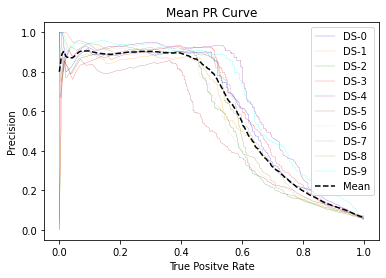

In [9]:
plt.plot(tpr_arr[0],pre_arr[0],color="blue",linewidth=0.2,label='DS-0')
plt.plot(tpr_arr[1],pre_arr[1],color="orange",linewidth=0.2,label='DS-1')
plt.plot(tpr_arr[2],pre_arr[2],color="green",linewidth=0.2,label='DS-2')
plt.plot(tpr_arr[3],pre_arr[3],color="red",linewidth=0.2,label='DS-3')
plt.plot(tpr_arr[4],pre_arr[4],color="purple",linewidth=0.2,label='DS-4')
plt.plot(tpr_arr[5],pre_arr[5],color="brown",linewidth=0.2,label='DS-5')
plt.plot(tpr_arr[6],pre_arr[6],color="pink",linewidth=0.2,label='DS-6')
plt.plot(tpr_arr[7],pre_arr[7],color="grey",linewidth=0.2,label='DS-7')
plt.plot(tpr_arr[8],pre_arr[8],color="olive",linewidth=0.2,label='DS-8')
plt.plot(tpr_arr[9],pre_arr[9],color="cyan",linewidth=0.2,label='DS-9')

mean_x_axis = [i for i in np.linspace(0,1,500)]
ys_interp = [np.interp(mean_x_axis, tpr_arr[i], pre_arr[i]) for i in range(len(tpr_arr))]
mean_y_axis = np.mean(ys_interp, axis=0)

#print(ys_interp)

plt.plot(mean_x_axis, mean_y_axis, color="black",linestyle='--',label='Mean')
#plt.show()
plt.title("Mean PR Curve")
plt.xlabel("True Positve Rate")
plt.ylabel("Precision")

plt.legend()
plt.savefig('foo2.pdf')

In [10]:
f=open('NRLMF_CVS1_tpr.txt','w')

for lst in tpr_arr:
    for item in lst:
        f.write(str(item)+' ')
    f.write('\n')
    
f.close()

f=open('NRLMF_CVS1_fpr.txt','w')

for lst in fpr_arr:
    for item in lst:
        f.write(str(item)+' ')
    f.write('\n')
    
f.close()

f=open('NRLMF_CVS1_pre.txt','w')

for lst in pre_arr:
    for item in lst:
        f.write(str(item)+' ')
    f.write('\n')
    
f.close()